In [88]:
#imports
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split



In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/MBAThreeRocks/plataformas-cognitivas-docker/master/database/BaseDefault02.csv')
df.head()

,nome,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,"Manley, Peel",3526.775946,40.188964,0,0,0,0,1,1,0
1,"Jehu, Mendez",2778.325564,40.767674,1,0,0,0,0,0,1
2,"Abdul Baari, al-Muhammed",3713.987220,42.495401,0,0,0,0,0,2,1
3,"Samuel, Mekonnen",5079.662011,36.422451,0,0,1,0,1,0,0
4,"Michael, Navajo",2686.503464,40.992398,1,0,0,1,0,1,1


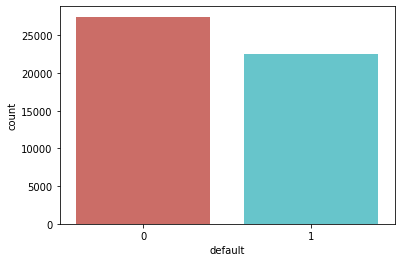

In [90]:
sb.countplot(x='default',data=df, palette='hls')

In [91]:
#Sem nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          50000 non-null  object 
 1   renda         50000 non-null  float64
 2   idade         50000 non-null  float64
 3   etnia         50000 non-null  int64  
 4   sexo          50000 non-null  int64  
 5   casapropria   50000 non-null  int64  
 6   outrasrendas  50000 non-null  int64  
 7   estadocivil   50000 non-null  int64  
 8   escolaridade  50000 non-null  int64  
 9   default       50000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 3.8+ MB


In [92]:
df.isnull().sum()

nome            0
renda           0
idade           0
etnia           0
sexo            0
casapropria     0
outrasrendas    0
estadocivil     0
escolaridade    0
default         0
dtype: int64

In [93]:
df.drop(['nome'],axis=1,inplace=True)
df.head()

,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,3526.775946,40.188964,0,0,0,0,1,1,0
1,2778.325564,40.767674,1,0,0,0,0,0,1
2,3713.987220,42.495401,0,0,0,0,0,2,1
3,5079.662011,36.422451,0,0,1,0,1,0,0
4,2686.503464,40.992398,1,0,0,1,0,1,1


In [94]:
df.corr()

,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
renda,1.000000,0.066969,-0.208057,-0.196445,0.314769,0.116165,0.098967,0.167226,-0.624217
idade,0.066969,1.000000,-0.031577,-0.031686,0.054420,0.026665,0.015630,0.028413,-0.111792
etnia,-0.208057,-0.031577,1.000000,0.106027,-0.169408,-0.060748,-0.055521,-0.082882,0.332546
sexo,-0.196445,-0.031686,0.106027,1.000000,-0.164694,-0.059103,-0.053261,-0.083515,0.322400
casapropria,0.314769,0.054420,-0.169408,-0.164694,1.000000,0.088997,0.086786,0.125409,-0.501735
outrasrendas,0.116165,0.026665,-0.060748,-0.059103,0.088997,1.000000,0.024674,0.046396,-0.179385
estadocivil,0.098967,0.015630,-0.055521,-0.053261,0.086786,0.024674,1.000000,0.039358,-0.155514
escolaridade,0.167226,0.028413,-0.082882,-0.083515,0.125409,0.046396,0.039358,1.000000,-0.258056
default,-0.624217,-0.111792,0.332546,0.322400,-0.501735,-0.179385,-0.155514,-0.258056,1.000000


In [95]:
#remove from corr
#df.drop(['sexo','etnia','idade'],axis=1,inplace=True)
#df.corr()

In [96]:
X = df.iloc[:,[0,1,2,3,4,5,6,7]].values
y = df.iloc[:,8].values

In [97]:
#Normalização do Conjunto
X = StandardScaler().fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

In [99]:
classificador = SVC(kernel="sigmoid", gamma=2)
#classificador = SVC(gamma=2, C=1)
classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      8227
           1       0.75      0.74      0.74      6773

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000

0.7681333333333333


[[6533 1694]
 [1784 4989]]


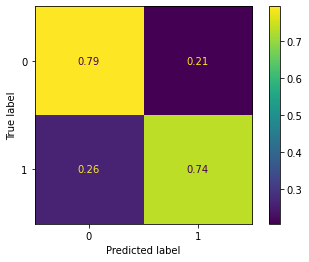

In [101]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(classificador, X_test, y_test, normalize = 'true')

In [103]:
from joblib import dump, load
dump(df, 'modelo02.joblib') 

['modelo02.joblib']